# ML methods, week 12 demo

## Libraries and settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [2]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# Diabetes PIMA data

In [3]:
dfo = pd.read_csv("diabetes.csv")
dfo.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [4]:
dfo.isnull().values.any()

False

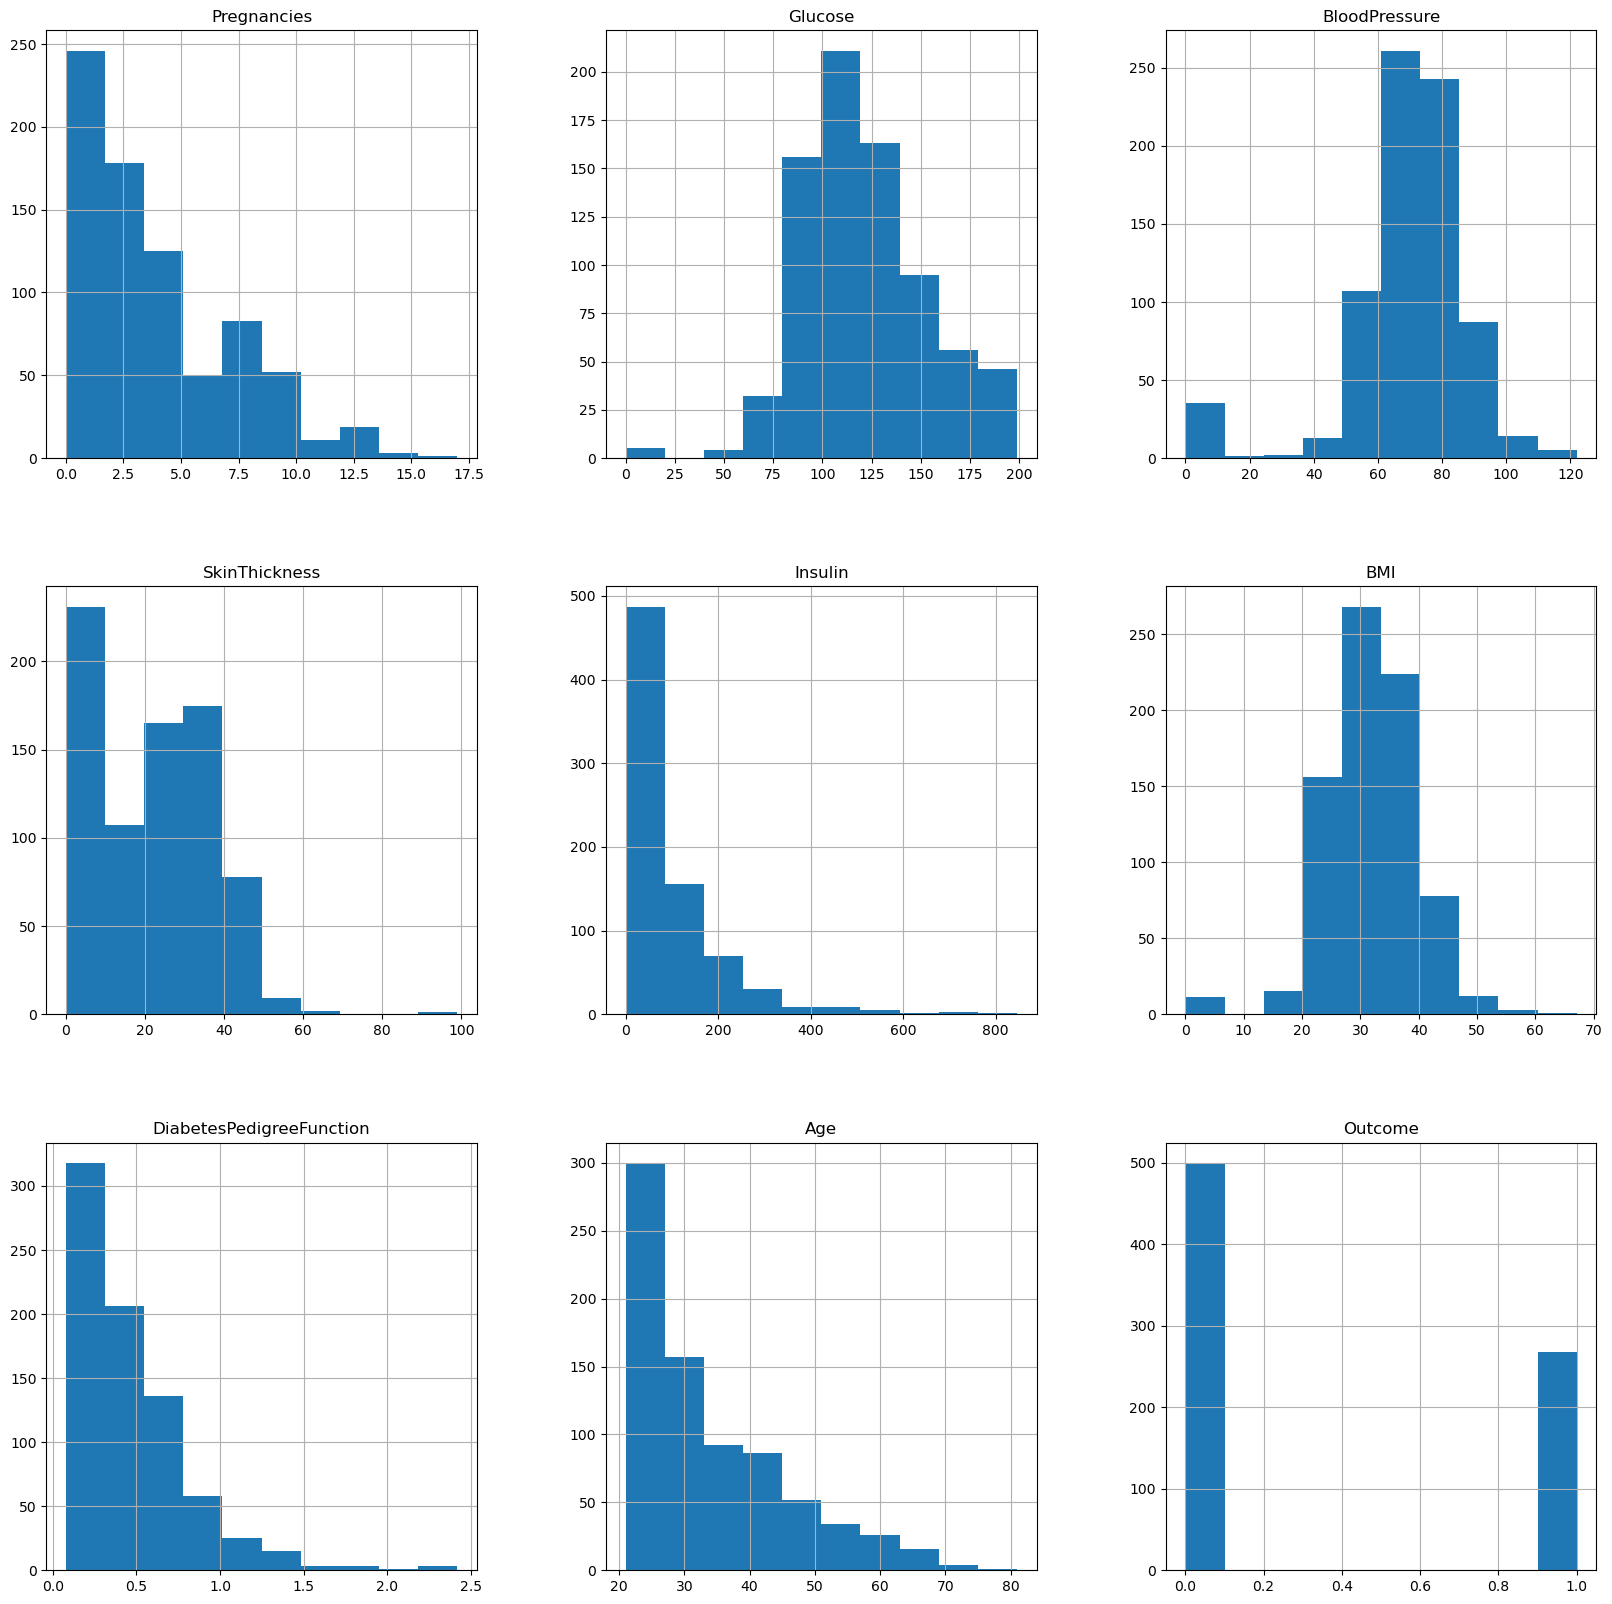

In [5]:
p = dfo.hist(figsize = (20,20))

In [6]:
(dfo == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
df = dfo.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfo[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

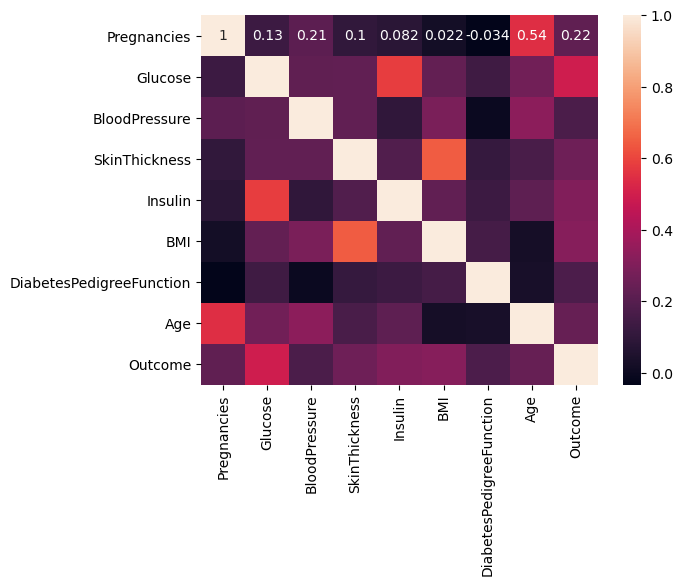

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


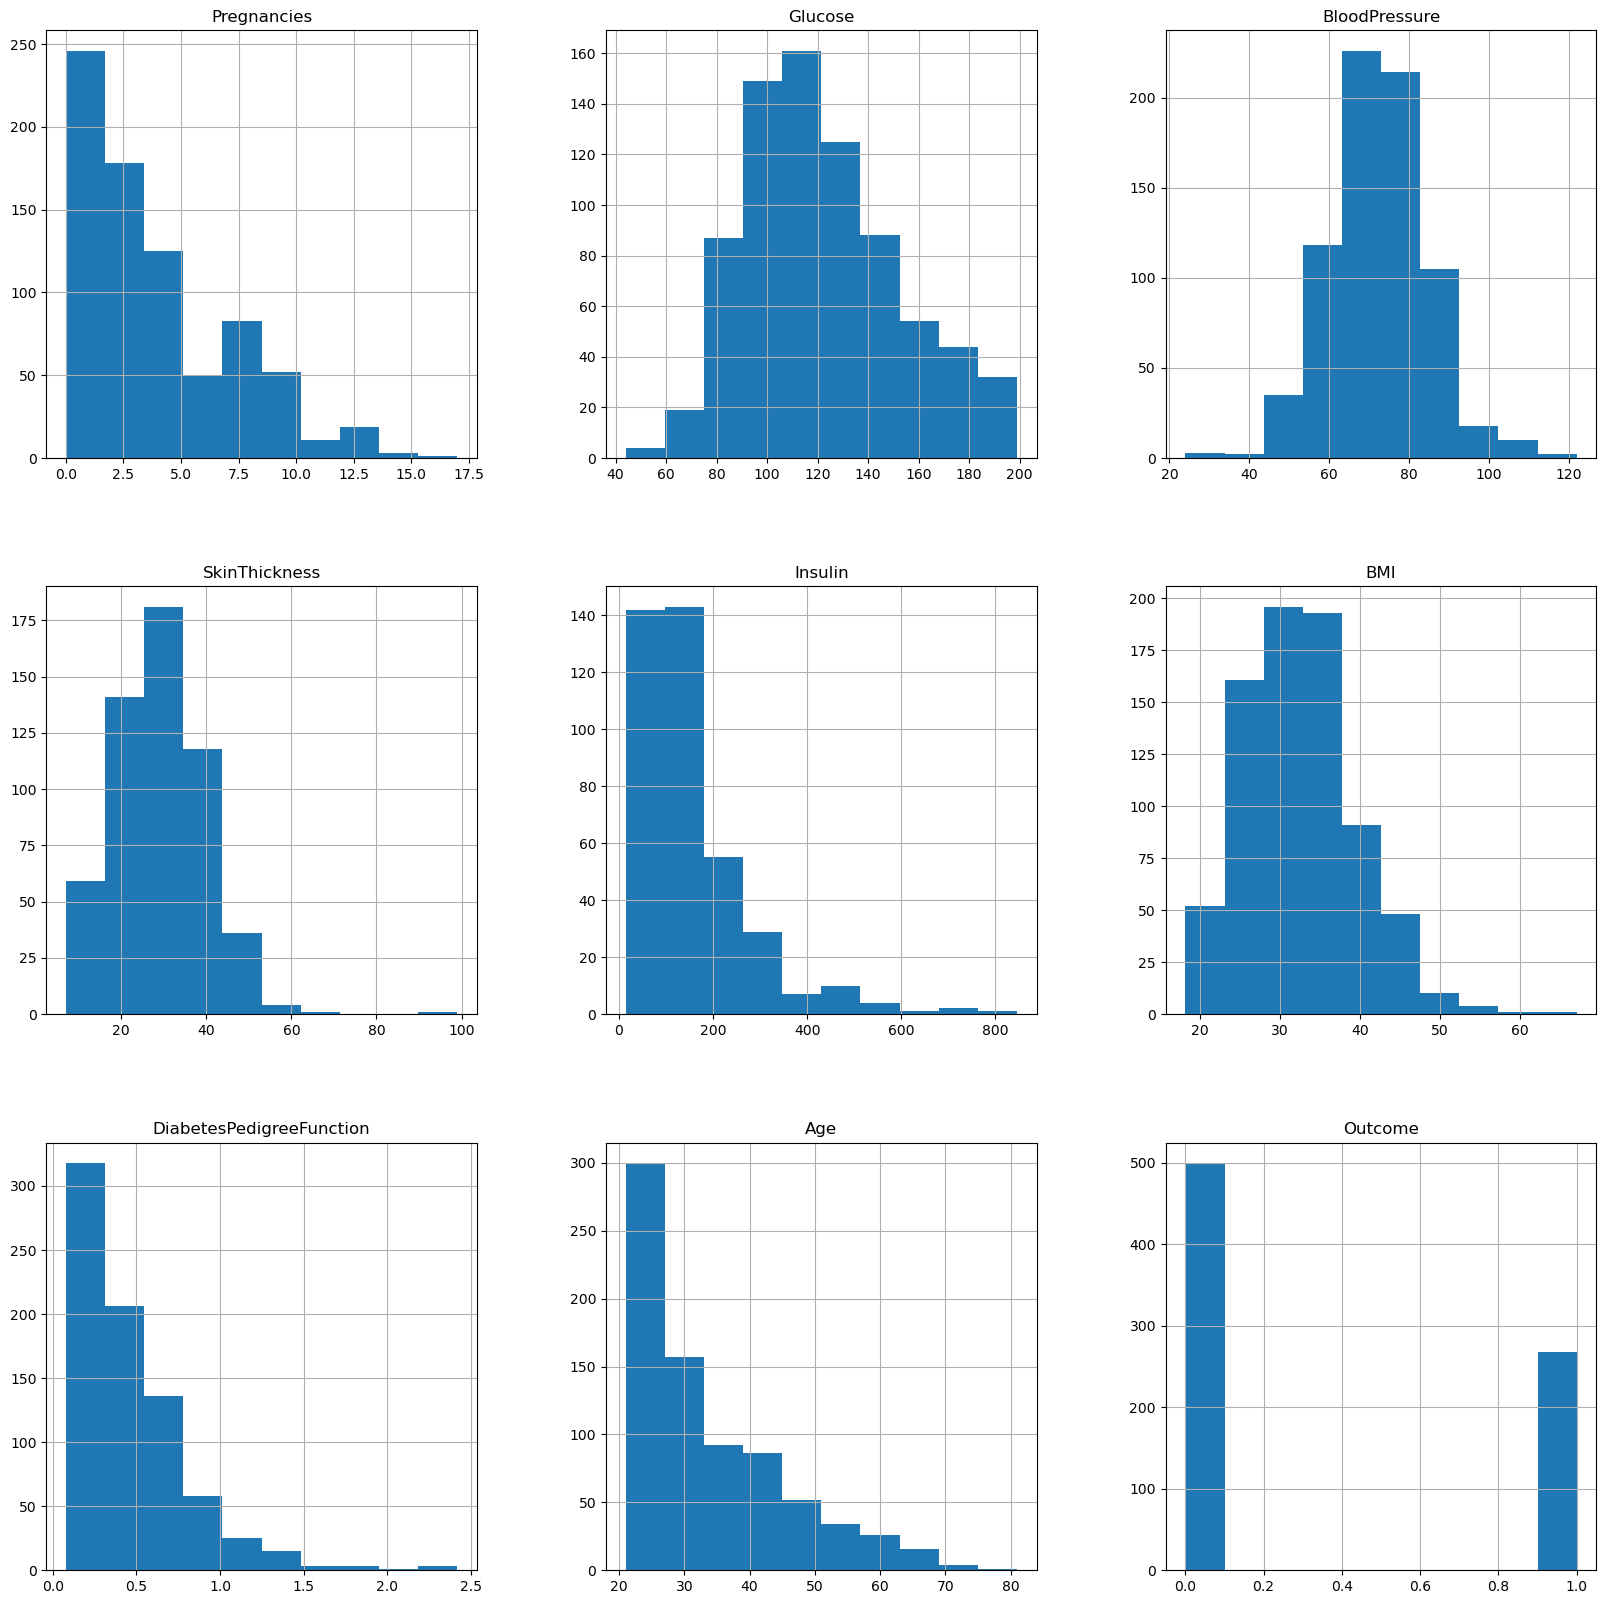

In [10]:
df.hist(figsize = (20,20))
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


<Axes: xlabel='Outcome'>

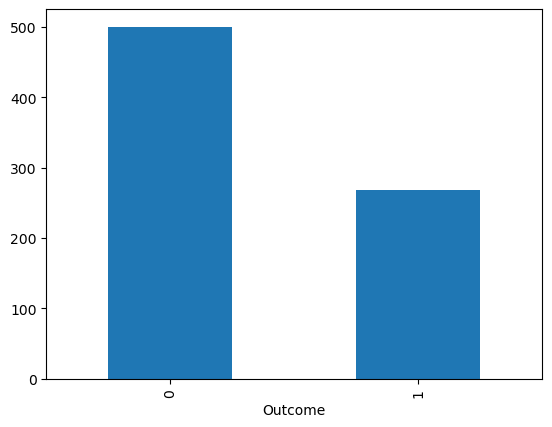

In [11]:
print(df.Outcome.value_counts())
df.Outcome.value_counts().plot(kind="bar")

In [12]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [13]:
X = df.drop('Outcome', axis=1)
y = np.array(df.Outcome)
y = df.Outcome
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 8)
<class 'pandas.core.series.Series'>
(768,)


In [14]:
df_diabetes_zeros_to_mean = df.copy(deep=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(614, 8)


In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(type(X_train_scaled))
print(X_train_scaled[0])

<class 'numpy.ndarray'>
[-0.5264 -1.2583 0.0132 0.0473 0.0074 0.0150 -0.4907 -1.0359]


In [17]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled[0])

[0.6819 -0.7928 -1.1783 0.5049 0.4038 0.2376 -0.1164 0.8781]


In [18]:
print(type(y_train))
print(y_train[:5])

<class 'pandas.core.series.Series'>
60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64


## Logistic Regression

In [19]:
# data refresh data, split, scale (if required)
# df = pd.read_csv("diabetes.csv")
# X = df.drop('Outcome', axis=1).to_numpy()
# y = df.Outcome.to_numpy() #.reshape(-1,1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [20]:
model = LogisticRegression(C=0.01, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [22]:
log_loss(y_test, y_pred)

8.425789103949464

In [23]:
confusion_matrix(y_test, y_pred)

array([[83, 16],
       [20, 35]])

In [24]:
print("%.4f" % accuracy_score(y_train, model.predict(X_train)))
print("%.4f" % accuracy_score(y_test, model.predict(X_test)))

0.7752
0.7662


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



/home/jpm/miniconda3/envs/io-ds/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


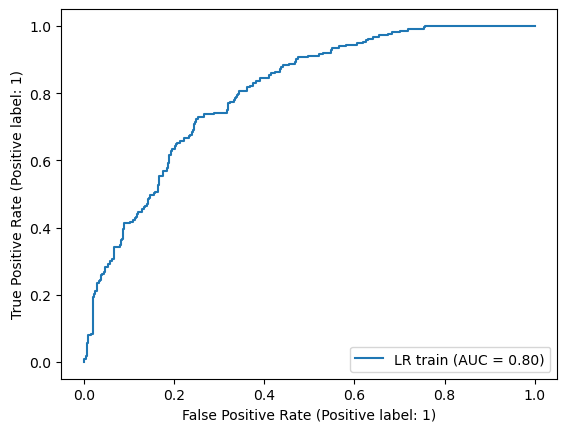

In [26]:
RocCurveDisplay.from_predictions(y_train, model.predict_proba(X_train_scaled)[:,1], name="LR train")  
plt.show()  

/home/jpm/miniconda3/envs/io-ds/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


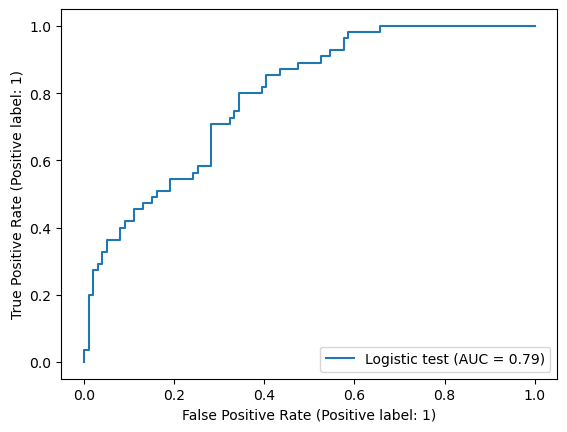

In [27]:
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test_scaled)[:,1], name="Logistic test")  
plt.show()  

### Model 2 - L1, Saga, C=0.1 

In [28]:
model2 = LogisticRegression(C=0.1, penalty="l1", solver="saga", max_iter=2000)
model2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', solver='saga')

In [29]:
y_pred = model2.predict(X_test)

In [30]:
log_loss(y_test, y_pred)

10.53223637993683

In [31]:
confusion_matrix(y_test, y_pred)

array([[86, 13],
       [32, 23]])

In [32]:
print("%.4f" % accuracy_score(y_train, model2.predict(X_train)))
print("%.4f" % accuracy_score(y_test, model2.predict(X_test)))

0.6922
0.7078


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        99
           1       0.64      0.42      0.51        55

    accuracy                           0.71       154
   macro avg       0.68      0.64      0.65       154
weighted avg       0.70      0.71      0.69       154



In [34]:
# practice saving a model
from joblib import dump, load
dump(model2, "logistic_model_2.joblib")

['logistic_model_2.joblib']

## Decision Tree Classifier

In [35]:
# scaling not needed for decision tree

In [36]:
# data refresh (df as feature names are needded)
# df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df.Outcome
# X = df.drop('Outcome', axis=1).to_numpy()
# y = df.Outcome.to_numpy() #.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
y_test.value_counts()
# nearly twice as many 0 as 1 (diabetes outcome)

Outcome
0    99
1    55
Name: count, dtype: int64

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_prob_train = model.predict_proba(X_train)[:, 1]
print(np.unique(y_prob_train, return_counts=True))
roc_auc_train = roc_auc_score(y_train, y_prob_train)
print(roc_auc_train)

(array([0.0000, 1.0000]), array([401, 213]))
1.0


In [40]:
y_prob = model.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))
roc_auc = roc_auc_score(y_test, y_prob)
print("%.4f" % roc_auc)
# Training model was over-fitted, test AUROC is much lower

(array([0.0000, 1.0000]), array([94, 60]))
0.6778


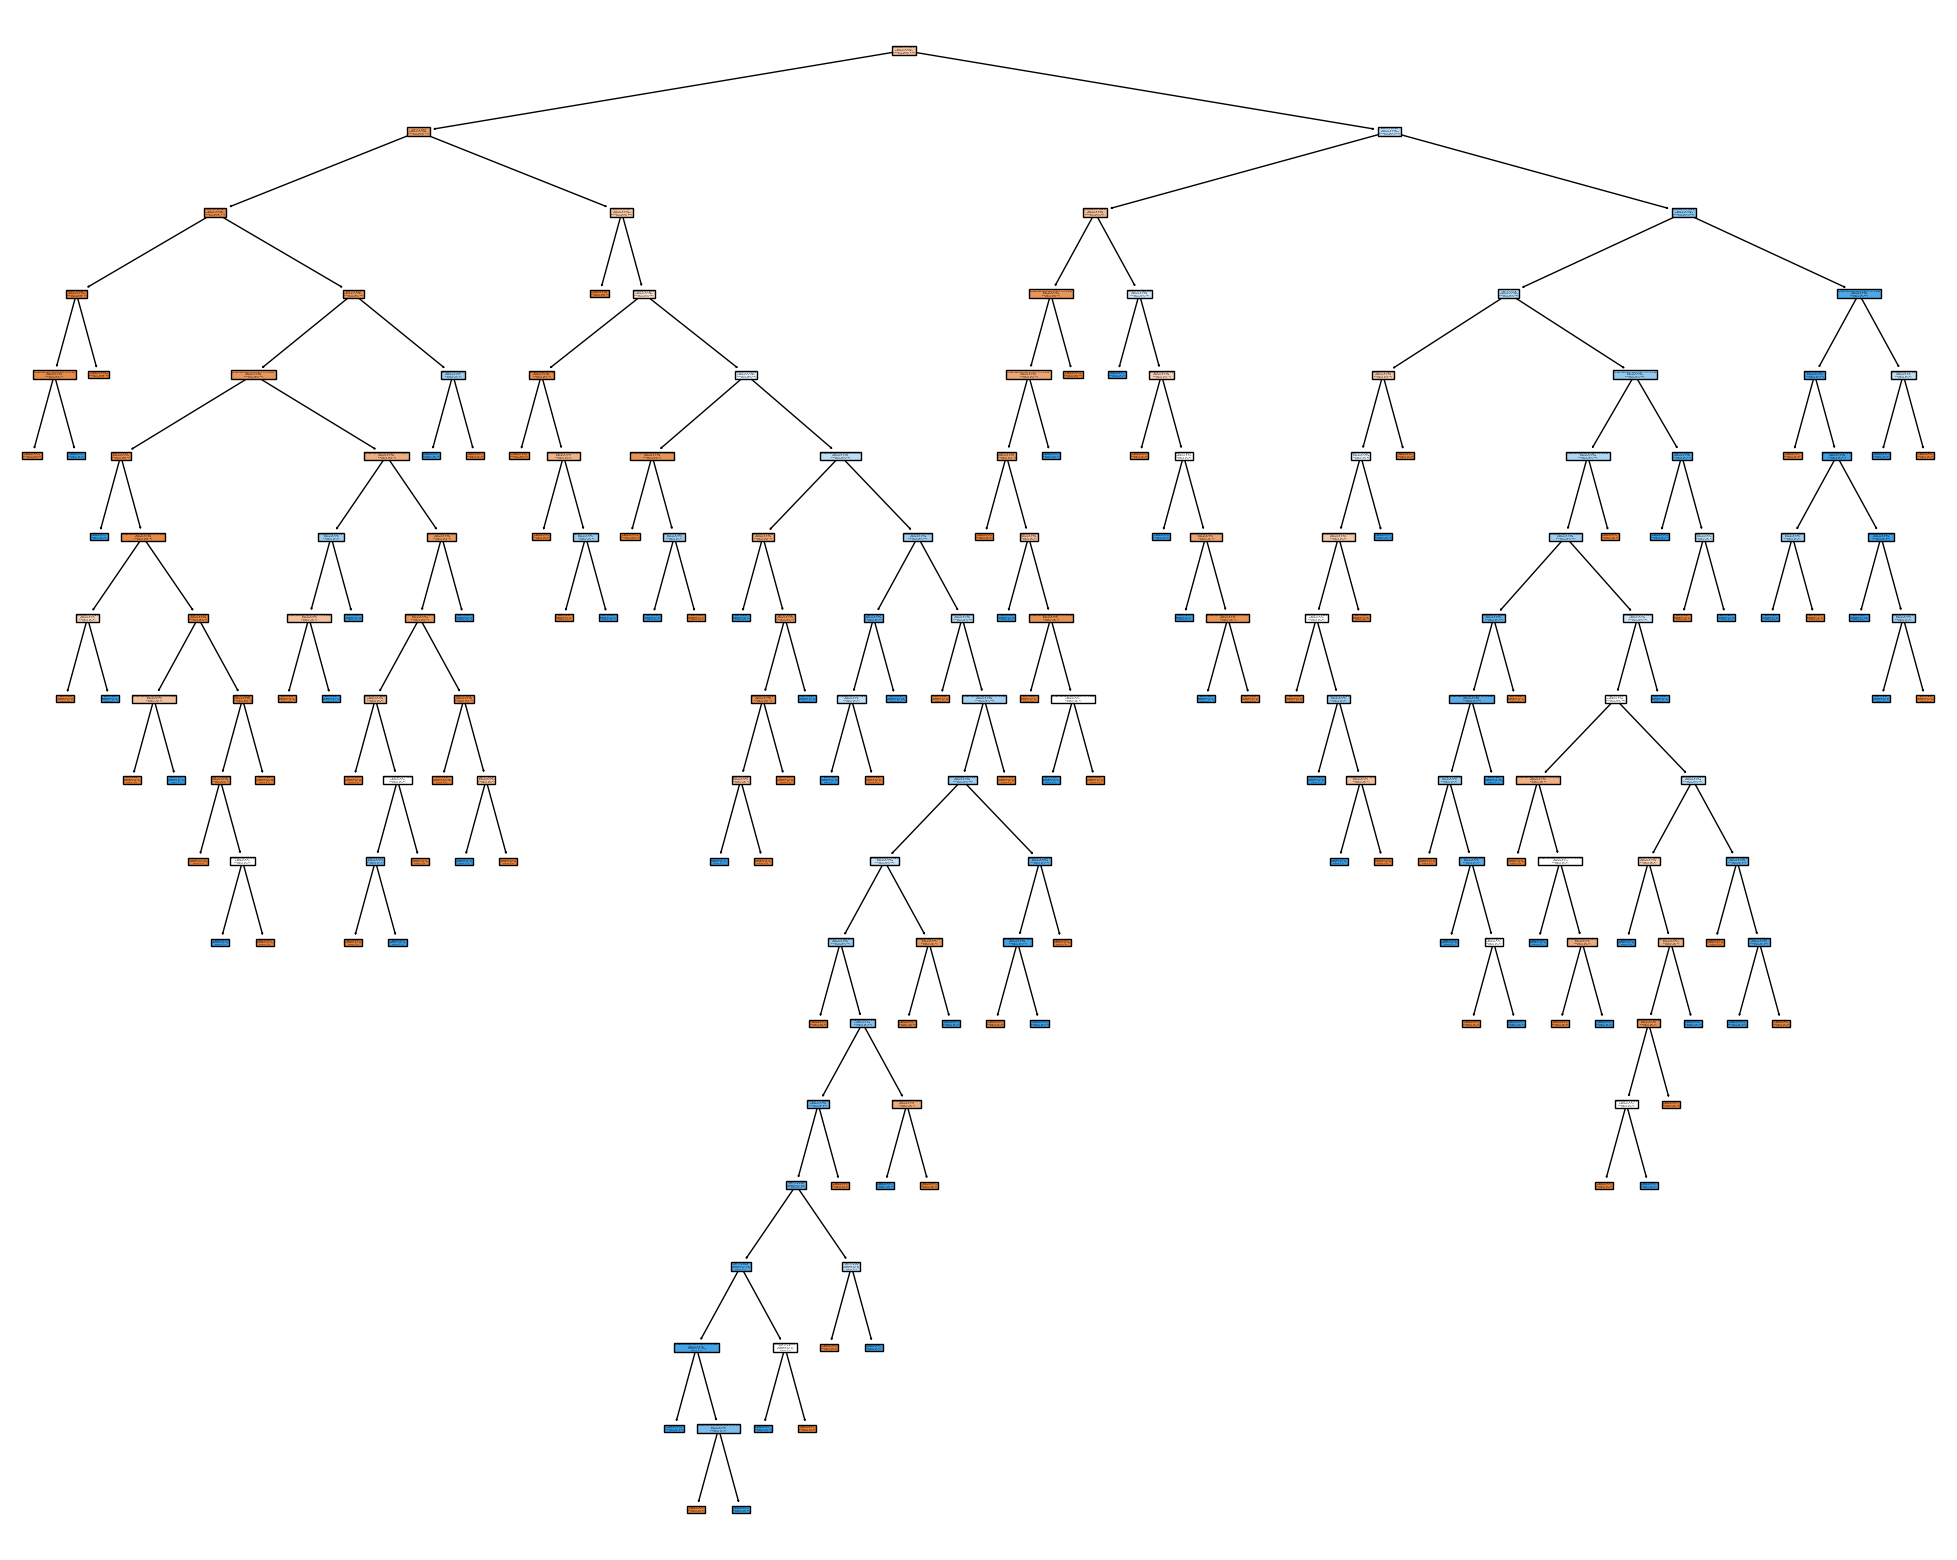

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [44]:
model.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [45]:
model.feature_importances_

array([0.0416, 0.3484, 0.0656, 0.0351, 0.1044, 0.1616, 0.1256, 0.1178])

<Axes: >

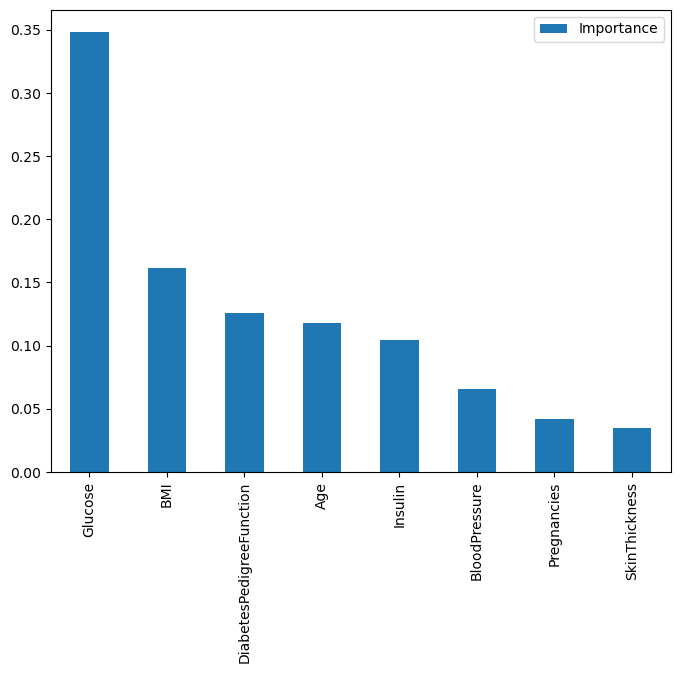

In [46]:
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [47]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[73 26]
 [21 34]]


### Tree-branching constrain to 2 levels 

In [48]:
model2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [49]:
y_prob = model2.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))

(array([0.0769, 0.3167, 0.3491, 0.7195]), array([50, 15, 45, 44]))


In [50]:
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

0.7711662075298439


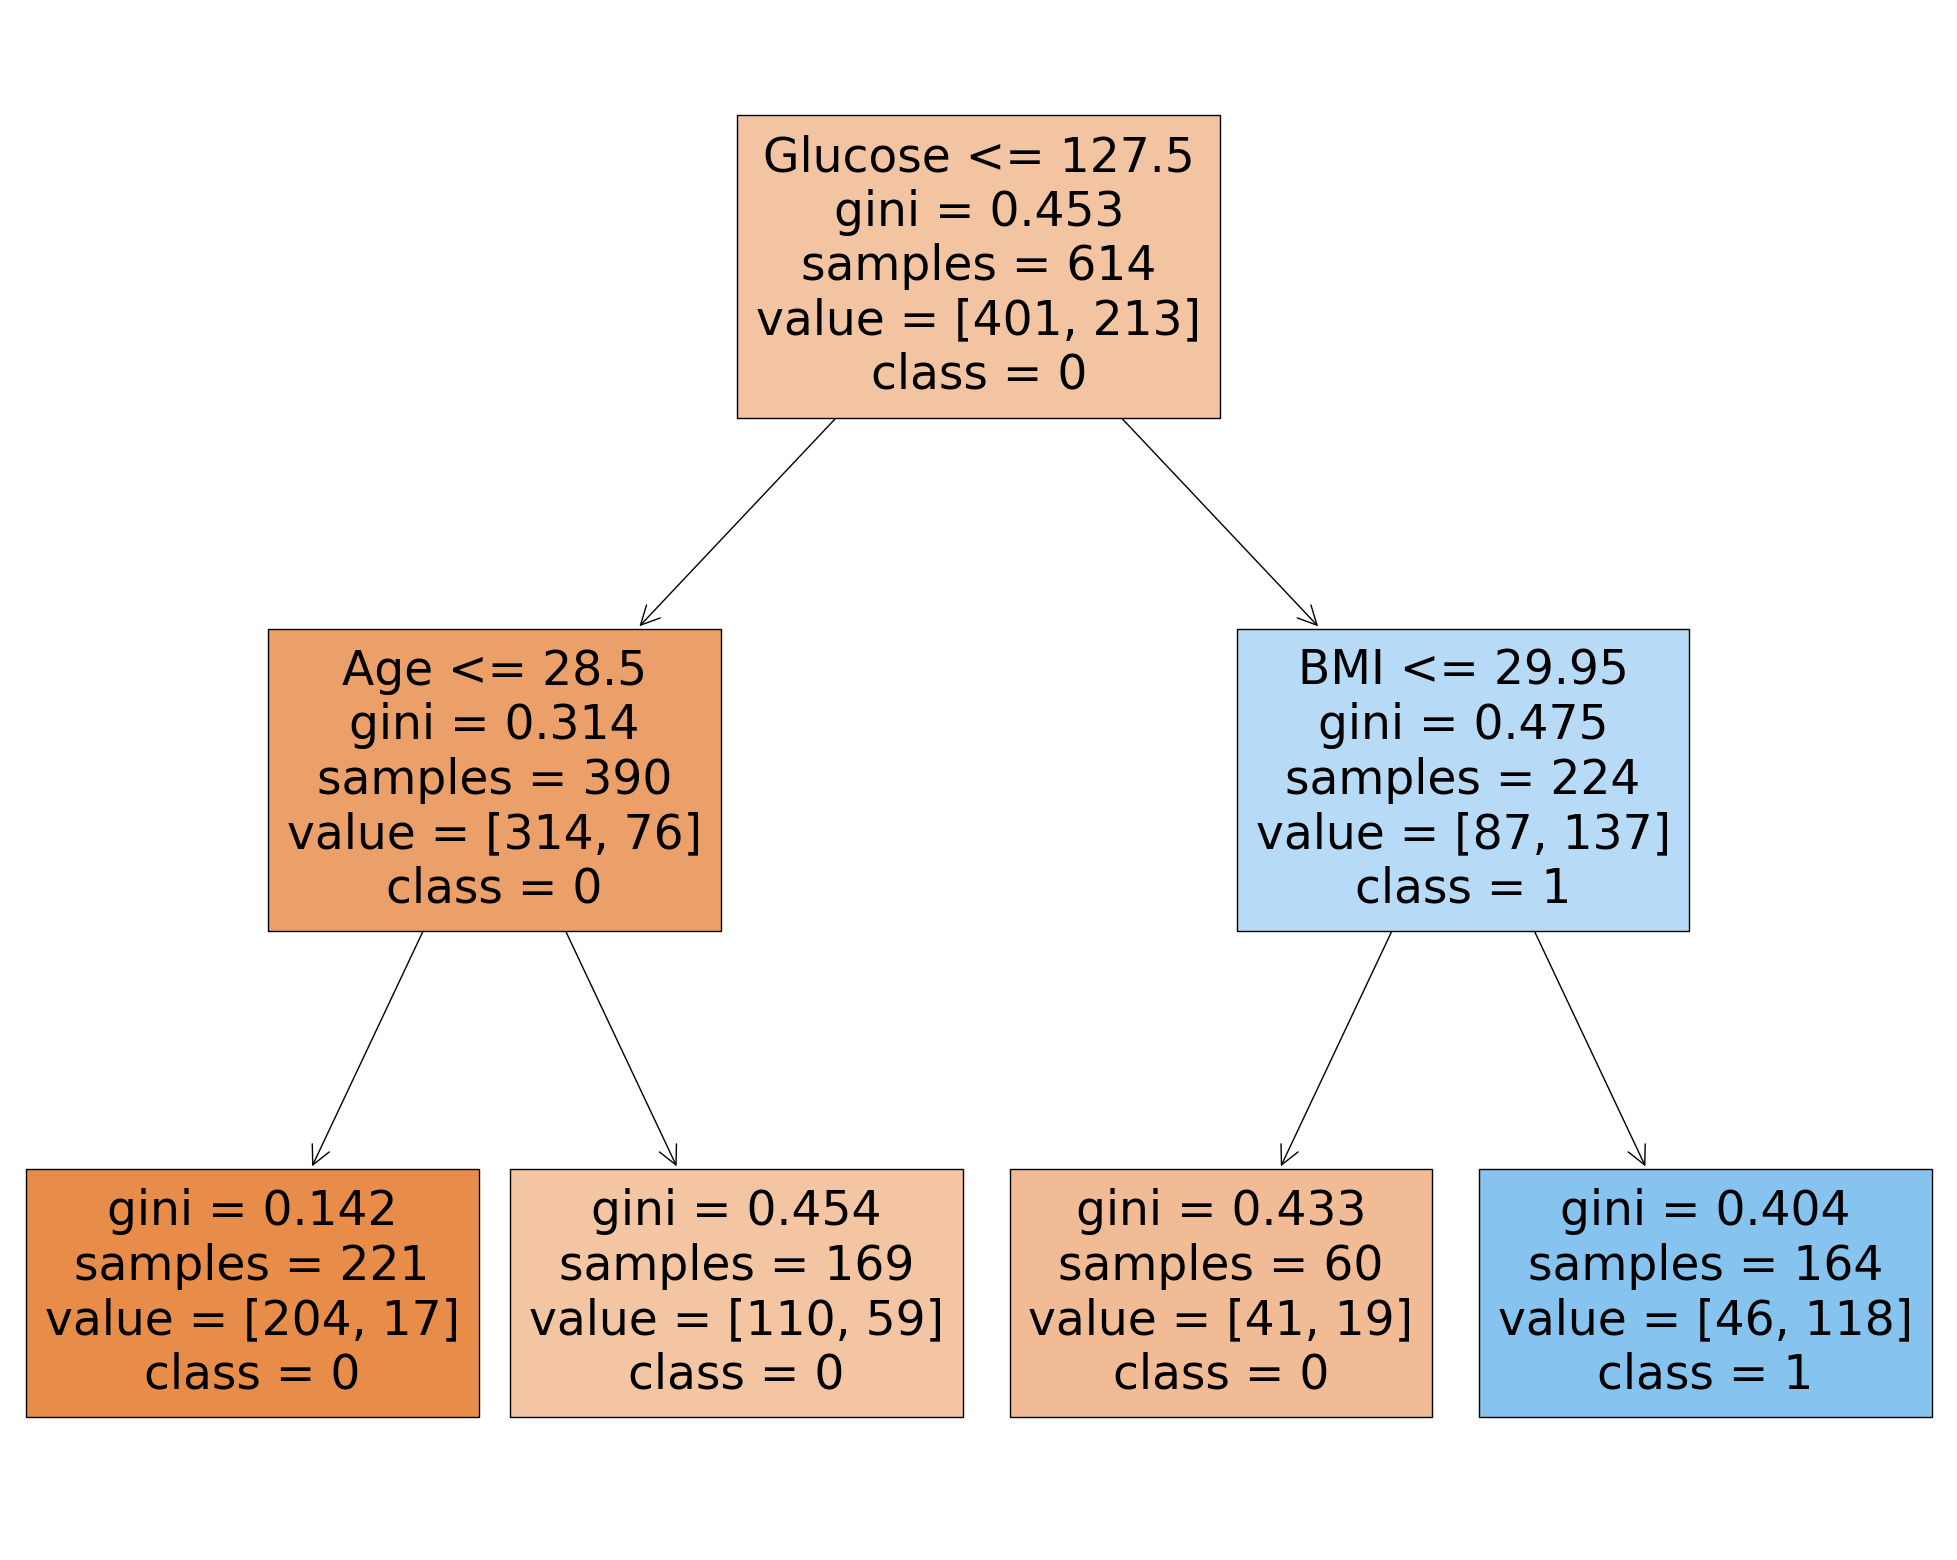

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model2, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [52]:
print(model2.feature_names_in_)
model2.feature_importances_

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


array([0.0000, 0.6347, 0.0000, 0.0000, 0.0000, 0.1831, 0.0000, 0.1822])

<Axes: >

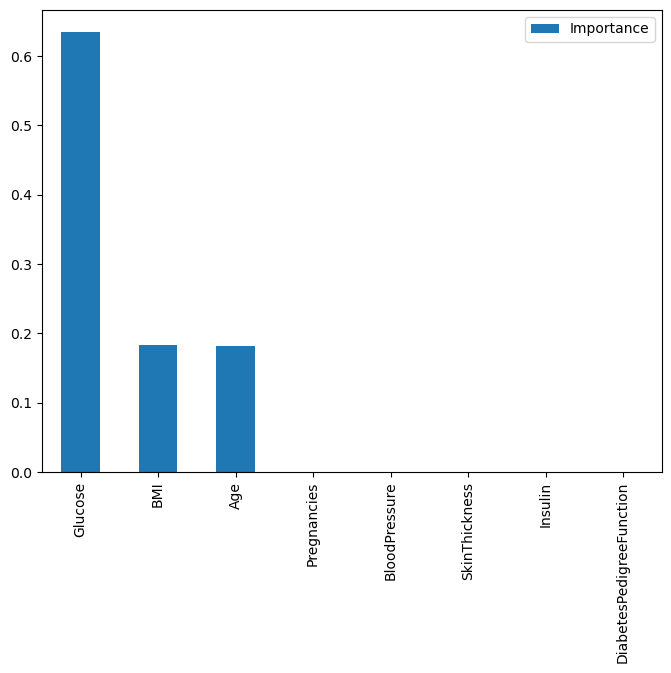

In [53]:
importances = pd.DataFrame(model2.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [54]:
y_pred = model2.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[87 12]
 [23 32]]


In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model2, legend=2)

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

## Random Forest - Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [57]:
y_prob = model.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))
roc_auc_score(y_test, y_prob)
# is better than one tree

(array([0.0000, 0.0250, 0.0500, 0.0750, 0.1000, 0.1250, 0.1500, 0.1750,
       0.2000, 0.2250, 0.2500, 0.2750, 0.3000, 0.3250, 0.3500, 0.3750,
       0.4000, 0.4500, 0.4750, 0.5000, 0.5250, 0.5500, 0.5750, 0.6000,
       0.6250, 0.6500, 0.6750, 0.7000, 0.7250, 0.7500, 0.7750, 0.8000,
       0.8250, 0.8500, 0.8750, 0.9000, 0.9250]), array([ 6, 13,  4,  7,  4,  6,  2,  7,  9,  6,  2,  5,  4,  2,  2,  6,  4,
        5,  1,  3,  5,  1,  5,  2,  1,  3,  4,  3,  6,  6,  5,  2,  6,  1,
        1,  2,  3]))


0.8223140495867769

In [58]:
model.feature_importances_

array([0.0744, 0.2575, 0.0799, 0.0783, 0.0805, 0.1581, 0.1193, 0.1520])

## Support Vector Classifier

In [59]:
# some SV* kernels (notably rbf) do require X scaling

In [60]:
# refresh data, split, scale, if required
# df = df_diabetes_zeros_to_mean
# X = df.drop('Outcome', axis=1)
# y = df.Outcome
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [61]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [62]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_prob[:5]

array([0.4592, 0.0794, 0.1132, 0.2803, 0.3954])

In [63]:
roc_auc_score(y_test, y_prob)

0.8104683195592286

In [64]:
# returns class labels, discrete category
y_pred = model.predict(X_test_scaled)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [65]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [66]:
y_decision = model.decision_function(X_test_scaled)
y_decision[:5]

array([-0.1004, -1.6104, -1.3521, -0.6150, -0.2746])

In [67]:
# what's the difference between X_test, y_test
# SVC.score (ratio of correctly predicted instances) 
# and metrics.accuracy_score (generic)
model.score(X_test, y_test)

/home/jpm/miniconda3/envs/io-ds/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.6428571428571429

In [68]:
confusion_matrix(y_test,y_pred)

array([[84, 15],
       [23, 32]])

In [69]:
model2 = SVC(kernel='rbf', probability=True, gamma=0.01)
model2.fit(X_train_scaled, y_train)
y_prob = model2.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)

0.8292011019283747

In [70]:
y_pred = model2.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
# small improvement with lower Gamma

array([[85, 14],
       [22, 33]])

In [71]:
model3 = SVC(kernel='poly', degree=5, probability=True)
model3.fit(X_train_scaled, y_train)
y_prob = model3.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)
# worse AUROC with polynomial SVC

0.7463728191000919

In [72]:
y_pred = model3.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
# halves false Negatives but increases false Positives, with polynomial SVC

array([[90,  9],
       [38, 17]])

In [73]:
from mlxtend.plotting import plot_decision_regions

In [74]:
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

In [75]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
            c='none', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o',
            s=100, label='Test set')